In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 35.6 MB/s eta 0:00:00


In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="xr5xeRj6zK5zl6vSgomL")
project = rf.workspace("sezgin-koc-3z1r3").project("license-plates-kwudy")
version = project.version(6)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to License-Plates-6 in yolov8:: 100%|██████████| 1864/1864 [00:00<00:00, 5487.49it/s]


In [4]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 314MB/s]


In [5]:
# Train the model
results = model.train(
    data='/content/License-Plates-6/data.yaml',
    epochs=10,
    imgsz=640,
    batch=16,
    name='custom_yolov8_model'
)


Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plates-6/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 117MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/License-Plates-6/train/labels... 647 images, 1 backgrounds, 0 corrupt: 100%|██████████| 647/647 [00:00<00:00, 1293.79it/s]


train: New cache created: /content/License-Plates-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 644, len(boxes) = 816. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/License-Plates-6/valid/labels... 184 images, 1 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<00:00, 964.35it/s]


val: New cache created: /content/License-Plates-6/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 164, len(boxes) = 214. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/custom_yolov8_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom_yolov8_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.3G      1.228      2.855      1.213          8        640: 100%|██████████| 41/41 [00:15<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        184        214    0.00415      0.857      0.161      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.23G      1.116      1.952      1.164          9        640: 100%|██████████| 41/41 [00:10<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all        184        214      0.914      0.315      0.422      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.23G      1.156      1.792      1.162         10        640: 100%|██████████| 41/41 [00:11<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.00it/s]

                   all        184        214      0.948       0.41      0.468      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.23G      1.072      1.518      1.132          7        640: 100%|██████████| 41/41 [00:13<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        184        214      0.993        0.5      0.506      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.23G      1.046      1.334      1.122          8        640: 100%|██████████| 41/41 [00:13<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]

                   all        184        214      0.997      0.494      0.508      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.24G     0.9988      1.239      1.104          8        640: 100%|██████████| 41/41 [00:13<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.38it/s]

                   all        184        214      0.997      0.497        0.5      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.23G     0.9749      1.138      1.092          9        640: 100%|██████████| 41/41 [00:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

                   all        184        214      0.495      0.548      0.506      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.23G     0.9056      1.048      1.056         11        640: 100%|██████████| 41/41 [00:11<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        184        214      0.997        0.5      0.511      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.23G     0.8896      1.001      1.043          7        640: 100%|██████████| 41/41 [00:10<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        184        214      0.511      0.629      0.518      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.23G     0.8669     0.9476      1.035          7        640: 100%|██████████| 41/41 [00:12<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]

                   all        184        214      0.536      0.548      0.527      0.414



10 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/custom_yolov8_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/custom_yolov8_model/weights/best.pt, 6.2MB

Validating runs/detect/custom_yolov8_model/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


                   all        184        214      0.537      0.548      0.527      0.415
                   car         27         31      0.097     0.0968     0.0618     0.0287
          licenseplate        183        183      0.976          1      0.993      0.801
Speed: 0.6ms preprocess, 3.5ms inference, 0.0ms loss, 10.4ms postprocess per image
Results saved to runs/detect/custom_yolov8_model


In [23]:
metrics = model.val(data='/content/License-Plates-6/data.yaml')

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/License-Plates-6/valid/labels.cache... 184 images, 1 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 164, len(boxes) = 214. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]


                   all        184        214      0.536      0.548      0.527      0.413
                   car         27         31     0.0964     0.0968     0.0618      0.029
          licenseplate        183        183      0.976          1      0.993      0.797
Speed: 0.7ms preprocess, 5.3ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/custom_yolov8_model6


In [27]:
# Test the model on your test dataset
results = model.predict(
    source='/content/License-Plates-6/test/images/Screenshot_107_png.rf.55856b4ec91833fb780ffa8398b10e64.jpg',  # Path to the folder containing test images or a single image
    save=True,
    conf=0.25,
    iou=0.45,
    imgsz=640
)

# Print results summary
for result in results:
    print(f"Image Path: {result.path}")
    print(f"Detected Objects: {len(result.boxes)}")  # Number of objects detected
    for box in result.boxes:
        print(f"Class: {box.cls}, Confidence: {box.conf}, Bounding Box: {box.xyxy}")



image 1/1 /content/License-Plates-6/test/images/Screenshot_107_png.rf.55856b4ec91833fb780ffa8398b10e64.jpg: 640x640 1 licenseplate, 18.7ms
Speed: 5.1ms preprocess, 18.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/custom_yolov8_model7
Image Path: /content/License-Plates-6/test/images/Screenshot_107_png.rf.55856b4ec91833fb780ffa8398b10e64.jpg
Detected Objects: 1
Class: tensor([1.], device='cuda:0'), Confidence: tensor([0.8021], device='cuda:0'), Bounding Box: tensor([[483.6335, 429.4047, 579.8899, 493.1688]], device='cuda:0')



image 1/1 /content/License-Plates-6/test/images/Screenshot_107_png.rf.55856b4ec91833fb780ffa8398b10e64.jpg: 640x640 1 licenseplate, 18.4ms
Speed: 3.0ms preprocess, 18.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


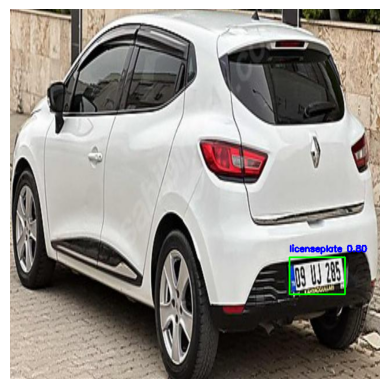

In [33]:
import cv2
import matplotlib.pyplot as plt

# Path to the image and the detected results (replace with your own image path)
image_path = '/content/License-Plates-6/test/images/Screenshot_107_png.rf.55856b4ec91833fb780ffa8398b10e64.jpg'


# Perform the detection
results = model.predict(
    source=image_path,
    save=False,  # Don't save, we'll draw the boxes manually
    conf=0.25,   # Confidence threshold
    iou=0.45,    # IOU threshold
    imgsz=640    # Image size
)

# Load the original image
image = cv2.imread(image_path)

# Iterate through detected results
for result in results:
    # Iterate through each detected box
    for box in result.boxes:
        # Extract bounding box coordinates (xyxy format), confidence, and class
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]
        class_id = int(box.cls[0])

        # Draw the bounding box on the image (Green box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add label and confidence on the image
        label = f"{model.names[class_id]} {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Convert BGR (OpenCV format) to RGB for displaying in Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')  # Hide axis
plt.show()

In [13]:
# Access mAP scores
map50 = metrics.box.map50  # mAP at IoU=0.50
map50_95 = metrics.box.map  # mAP at IoU=0.50:0.95
print(f'mAP@0.5: {map50}, mAP@0.5:0.95: {map50_95}')

mAP@0.5: 0.5273604411061609, mAP@0.5:0.95: 0.4127558426058206


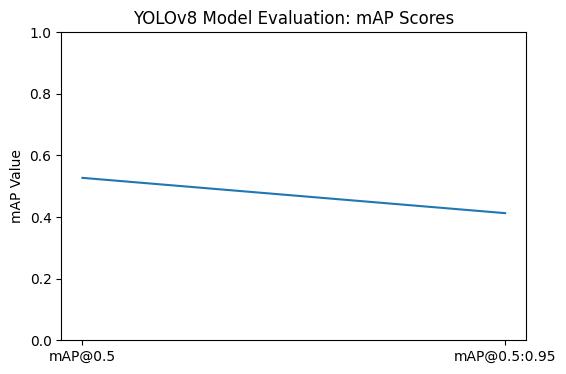

In [35]:

# mAP results
map50 = 0.5273604411061609  # mAP@0.5
map50_95 = 0.4127558426058206  # mAP@0.5:0.95

# Plotting mAP results
metrics = ['mAP@0.5', 'mAP@0.5:0.95']
values = [map50, map50_95]

plt.figure(figsize=(6, 4))
plt.plot(metrics, values)

plt.title('YOLOv8 Model Evaluation: mAP Scores')
plt.ylabel('mAP Value')
plt.ylim(0, 1)  # Since mAP values are between 0 and 1
plt.show()
